In [6]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import os

In [7]:
DATA_TEST = r"C:\Users\caovi\OneDrive\Desktop\projet annuel\core\squat_model\data\squat_test_full.csv"
MODEL_PATH = r"C:\Users\caovi\OneDrive\Desktop\projet annuel\core\squat_model\model\squat_mlp_full.pt"
SCALER_PATH = r"C:\Users\caovi\OneDrive\Desktop\projet annuel\core\squat_model\model\scaler_full.pkl"

df = pd.read_csv(DATA_TEST)
X = df.drop("label", axis=1).values
y = df["label"].values

with open(SCALER_PATH, "rb") as f:
    scaler = pickle.load(f)

X = scaler.transform(X)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
print("Test dataset:", X.shape, y.shape)

Test dataset: torch.Size([1511, 132]) torch.Size([1511])


In [8]:
class MLP_Full(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(input_dim,256),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.3),
            torch.nn.Linear(256,128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.3),
            torch.nn.Linear(128,64),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.3),
            torch.nn.Linear(64,1)
        )
    def forward(self,x):
        return self.net(x)

model = MLP_Full(X.shape[1])
model.load_state_dict(torch.load(MODEL_PATH, map_location="cpu"))
model.eval()


C:\Users\caovi\AppData\Local\Temp\ipykernel_4816\2552165154.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH, map_location="c

MLP_Full(
  (net): Sequential(
    (0): Linear(in_features=132, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [9]:
with torch.no_grad():
    probs = torch.sigmoid(model(X)).squeeze().numpy()
    preds = (probs > 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc  = accuracy_score(y, preds)
prec = precision_score(y, preds)
rec  = recall_score(y, preds)
f1   = f1_score(y, preds)

print("\n=== METRICS ===")
print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)



=== METRICS ===
Accuracy : 0.8808735936465917
Precision: 0.9988344988344988
Recall   : 0.8272200772200772
F1 Score : 0.9049630411826821


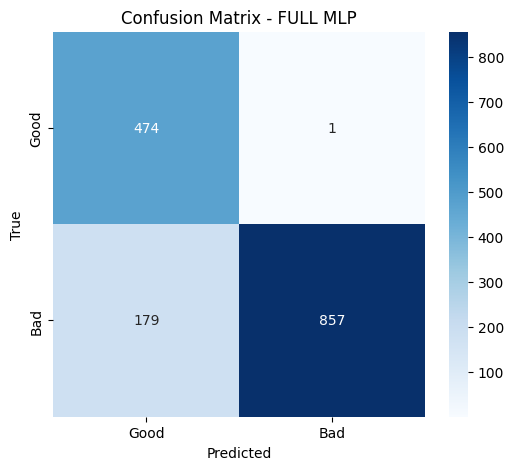

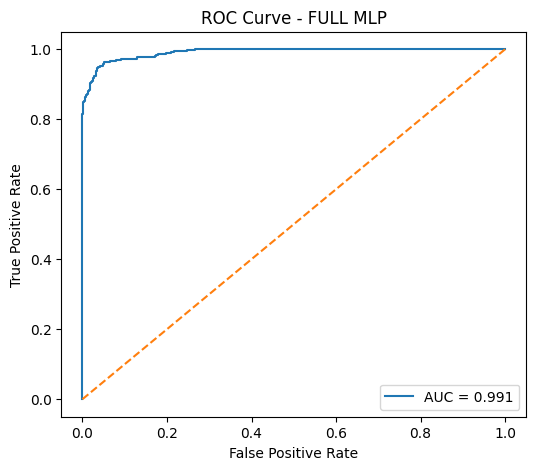

In [10]:
# 5. Confusion Matrix

cm = confusion_matrix(y, preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Good", "Bad"],
            yticklabels=["Good", "Bad"])
plt.title("Confusion Matrix - FULL MLP")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 6. ROC Curve

fpr, tpr, _ = roc_curve(y, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - FULL MLP")
plt.legend()
plt.show()
